# Python Week 2 Tutorial

This is a formatted review of the python examples done in the Week 2 class. The data file can be found in the folder with this notebook on GitHub. The file contains temperature measurements (in k) from 4 corners of a room. The loading of the data can be used if the data file is in the same folder as the python file.

In [19]:
import os
import pandas as pd
room_temperatures = pd.read_csv(os.getcwd() + os.sep + "room-temperature.csv", delimiter=';')
print(room_temperatures)

                 Date  FrontLeft  FrontRight  BackLeft  BackRight
0    04.11.2010 11:30      295.2       297.0     295.8      296.3
1    04.11.2010 12:00      296.2       296.4     296.2      296.3
2    04.11.2010 12:30      297.3       297.5     296.7      297.1
3    04.11.2010 13:00      295.9       296.7     297.4      297.0
4    04.11.2010 13:30      297.2       296.5     297.6      297.4
..                ...        ...         ...       ...        ...
141   4/14/2010 10:00      295.9       295.8     295.5      295.2
142   4/14/2010 10:30      295.1       296.2     296.0      296.1
143   4/14/2010 11:00      296.2       297.2     296.6      296.0
144   4/14/2010 11:15       -1.0       300.0     300.0      300.0
145   4/14/2010 11:30      300.0       350.0     300.0      300.0

[146 rows x 5 columns]


In [20]:
# Get the columns of the data and drop the date column
print(room_temperatures.columns)
room_temperatures = room_temperatures.drop(columns=['Date'])
print(room_temperatures)

Index(['Date', 'FrontLeft', 'FrontRight', 'BackLeft', 'BackRight'], dtype='object')
     FrontLeft  FrontRight  BackLeft  BackRight
0        295.2       297.0     295.8      296.3
1        296.2       296.4     296.2      296.3
2        297.3       297.5     296.7      297.1
3        295.9       296.7     297.4      297.0
4        297.2       296.5     297.6      297.4
..         ...         ...       ...        ...
141      295.9       295.8     295.5      295.2
142      295.1       296.2     296.0      296.1
143      296.2       297.2     296.6      296.0
144       -1.0       300.0     300.0      300.0
145      300.0       350.0     300.0      300.0

[146 rows x 4 columns]


Instead of importing the date column and dropping it, you can import the data but replace the default index (a list of 0 to n-1, where n is the number of data points) with the date as the index. 

In [22]:
room_temperatures = pd.read_csv(os.getcwd() + os.sep + "room-temperature.csv", delimiter=';', index_col='Date')
print(room_temperatures)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0
4/14/2010 11:15        -1.0       300.0     300.0      300.0
4/14/2010 11:30       300.0       350.0     300.0      300.0

[146 rows x 4 columns]


We will now give some examples for different ways to query the dataframe. The first will be to convert bad data to 'nan' (not a number) values and then remove them. This can be advantageous because it's easy to replace nan values in python.

In [23]:
# Method 1, square bracket column indexing
# Negative temperatures don't make sense in this case
good_data = room_temperatures[room_temperatures > 0]
print(good_data)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0
4/14/2010 11:15         NaN       300.0     300.0      300.0
4/14/2010 11:30       300.0       350.0     300.0      300.0

[146 rows x 4 columns]


You can see the second last row now contains a NaN value instead of -1. There are many methods to replace NaN values easily in python. In this case, we'll simply delete the row (axis=0). axis=0 refers that we're deleting a row. If we did axis=1 we would delete the whole column.

In [24]:
good_data1 = good_data.dropna(axis=0)
print(good_data1)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 9:30        294.8       295.5     294.7      295.6
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0
4/14/2010 11:30       300.0       350.0     300.0      300.0

[145 rows x 4 columns]


Method two involves use of the [.query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) function. The query function returns a dataframe with only the values that match the criteria. In this case, the row containing -1 will be removed after executing the query.

In [25]:
good_data = room_temperatures.query("0 < FrontLeft")
print(good_data)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 9:30        294.8       295.5     294.7      295.6
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0
4/14/2010 11:30       300.0       350.0     300.0      300.0

[145 rows x 4 columns]


Queries can be combined using logical statements, this query removes the last two rows because they don't fit the criteria.

In [27]:
good_data = room_temperatures.query("0 < FrontLeft and FrontRight < 350")
print(good_data)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 9:00        295.8       294.6     294.8      295.7
4/14/2010 9:30        294.8       295.5     294.7      295.6
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0

[144 rows x 4 columns]


When the data has many columns, manually writing out the query statements can be annoying. Looping over the columns works well when you want to filter the same values from all columns. Again the last two rows will be removed in the example below.

In [29]:
dummy = room_temperatures.copy()
for i in room_temperatures.columns:
    query_string = "0 < " + i + " < 350"
    dummy = dummy.query(query_string)
print(dummy)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 9:00        295.8       294.6     294.8      295.7
4/14/2010 9:30        294.8       295.5     294.7      295.6
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0

[144 rows x 4 columns]


The third method is using .loc. 

In [31]:
bad_data = room_temperatures.loc[room_temperatures['FrontLeft'] > 0]
print(bad_data)

                  FrontLeft  FrontRight  BackLeft  BackRight
Date                                                        
04.11.2010 11:30      295.2       297.0     295.8      296.3
04.11.2010 12:00      296.2       296.4     296.2      296.3
04.11.2010 12:30      297.3       297.5     296.7      297.1
04.11.2010 13:00      295.9       296.7     297.4      297.0
04.11.2010 13:30      297.2       296.5     297.6      297.4
...                     ...         ...       ...        ...
4/14/2010 9:30        294.8       295.5     294.7      295.6
4/14/2010 10:00       295.9       295.8     295.5      295.2
4/14/2010 10:30       295.1       296.2     296.0      296.1
4/14/2010 11:00       296.2       297.2     296.6      296.0
4/14/2010 11:30       300.0       350.0     300.0      300.0

[145 rows x 4 columns]


Now let's look at a plotting example. First let's plot the data from the four columns all on the same line plot.

Text(0, 0.5, 'Temperature (K)')

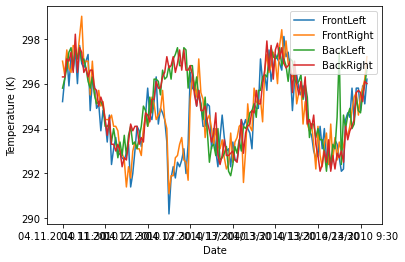

In [33]:
ax = good_data.plot()
ax.set_ylabel("Temperature (K)")

As we discussed in class when the lines on a plot all jumble it can be hard to read. Let's look at how to easily plot the data on separate axes. This can be done with the layout option. The layout specifies the subplot layout. layout=(num_rows, num_cols). The individual subplots can be accessed using standard list indexing methods.

Text(0, 0.5, 'T FrontLeft')

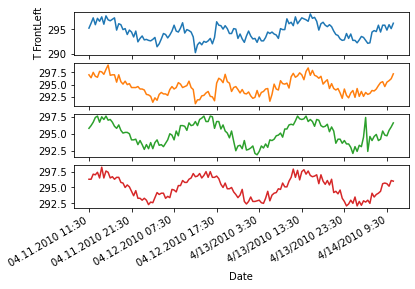

In [35]:
axes = good_data.plot(subplots=True, layout=(4,1), legend=False)
axes[0,0].set_ylabel("T FrontLeft")

Of course these plots need additional formatting, additional methods outlined in the ReadingDataandPlotting tutorial could help.